In [25]:
import os
import re
import aocd
import numpy as np
import pandas as pd
from aocd import submit
from tqdm import tqdm
from collections import Counter
from copy import deepcopy
import matplotlib.pyplot as plt

test = """Player 1 starting position: 4
Player 2 starting position: 8""".split('\n')

data = """Player 1 starting position: 7
Player 2 starting position: 3""".split('\n')
data = test
data = [int(x.split(' ')[-1]) for x in data]
data

[4, 8]

In [23]:
p1_pos, p2_pos = data
p1_score, p2_score = 0,0
die = [100] + list(range(1,100))
die_loc = 1
board = [10] + list(range(1,10))
p1_board_loc = p1_pos
p2_board_loc = p2_pos
turn = 'p1'
k=1
while (p1_score < 1000) and (p2_score < 1000):
    
    for _ in range(3):
        move = die[die_loc%100]
        if turn == 'p1':
            p1_board_loc += move
            new_p1_pos = board[p1_board_loc%10]
            p1_pos = new_p1_pos
            
        if turn == 'p2':
            p2_board_loc += move
            new_p2_pos = board[p2_board_loc%10]
            p2_pos = new_p2_pos
        print(_,p1_pos,p2_pos)
        die_loc += 1
        
        
        
    if turn == 'p1':
        p1_score += new_p1_pos
        
        turn = 'p2'
    else:
        p2_score += new_p2_pos
        turn = 'p1'
    print(f'\nRound {k}')
    print('p1_score',p1_score)
    print('p2_score',p2_score)
    
    k+= 1
    #if k == 10:
    #    break


0 8 3
1 10 3
2 3 3

Round 1
p1_score 3
p2_score 0
0 3 7
1 3 2
2 3 8

Round 2
p1_score 3
p2_score 8
0 10 8
1 8 8
2 7 8

Round 3
p1_score 10
p2_score 8
0 7 8
1 7 9
2 7 1

Round 4
p1_score 10
p2_score 9
0 10 1
1 4 1
2 9 1

Round 5
p1_score 19
p2_score 9
0 9 7
1 9 4
2 9 2

Round 6
p1_score 19
p2_score 11
0 8 2
1 8 2
2 9 2

Round 7
p1_score 28
p2_score 11
0 9 4
1 9 7
2 9 1

Round 8
p1_score 28
p2_score 12
0 4 1
1 10 1
2 7 1

Round 9
p1_score 35
p2_score 12
0 7 9
1 7 8
2 7 8

Round 10
p1_score 35
p2_score 20
0 8 8
1 10 8
2 3 8

Round 11
p1_score 38
p2_score 20
0 3 2
1 3 7
2 3 3

Round 12
p1_score 38
p2_score 23
0 10 3
1 8 3
2 7 3

Round 13
p1_score 45
p2_score 23
0 7 3
1 7 4
2 7 6

Round 14
p1_score 45
p2_score 29
0 10 6
1 4 6
2 9 6

Round 15
p1_score 54
p2_score 29
0 9 2
1 9 9
2 9 7

Round 16
p1_score 54
p2_score 36
0 8 7
1 8 7
2 9 7

Round 17
p1_score 63
p2_score 36
0 9 9
1 9 2
2 9 6

Round 18
p1_score 63
p2_score 42
0 4 6
1 10 6
2 7 6

Round 19
p1_score 70
p2_score 42
0 7 4
1 7 3
2 7 3

R

1 8 7
2 9 7

Round 257
p1_score 903
p2_score 576
0 9 9
1 9 2
2 9 6

Round 258
p1_score 903
p2_score 582
0 4 6
1 10 6
2 7 6

Round 259
p1_score 910
p2_score 582
0 7 4
1 7 3
2 7 3

Round 260
p1_score 910
p2_score 585
0 8 3
1 10 3
2 3 3

Round 261
p1_score 913
p2_score 585
0 3 7
1 3 2
2 3 8

Round 262
p1_score 913
p2_score 593
0 10 8
1 8 8
2 7 8

Round 263
p1_score 920
p2_score 593
0 7 8
1 7 9
2 7 1

Round 264
p1_score 920
p2_score 594
0 10 1
1 4 1
2 9 1

Round 265
p1_score 929
p2_score 594
0 9 7
1 9 4
2 9 2

Round 266
p1_score 929
p2_score 596
0 8 2
1 8 2
2 9 2

Round 267
p1_score 938
p2_score 596
0 9 4
1 9 7
2 9 1

Round 268
p1_score 938
p2_score 597
0 4 1
1 10 1
2 7 1

Round 269
p1_score 945
p2_score 597
0 7 9
1 7 8
2 7 8

Round 270
p1_score 945
p2_score 605
0 8 8
1 10 8
2 3 8

Round 271
p1_score 948
p2_score 605
0 3 2
1 3 7
2 3 3

Round 272
p1_score 948
p2_score 608
0 10 3
1 8 3
2 7 3

Round 273
p1_score 955
p2_score 608
0 7 3
1 7 4
2 7 6

Round 274
p1_score 955
p2_score 614
0 10 6
1 

In [44]:
#outcomes rolling 3 sided die 3 times:

rolls = []
for d1 in range(1,4):
    for d2 in range(1,4):
        for d3 in range(1,4):
            rolls += [(d1,d2,d3,d1+d2+d3)]
#frequency of outcomes of rolls
outcomes = Counter([x[3] for x in rolls])
outcomes, data

(Counter({3: 1, 4: 3, 5: 6, 6: 7, 7: 6, 8: 3, 9: 1}), [4, 8])

In [53]:

p1_pos, p2_pos = data

board = [10] + list(range(1,10))

prev_p1 = [(p1_pos,p1_pos,0,1,0)]
prev_p2 = [(p2_pos,p2_pos,0,1,0)]
final_p1 = []
final_p2 = []
turn = 'p1'
k=1
while len(prev_p1):
    _next = []
        
    for prev_board_loc,prev_pos,prev_score,prev_n_universes,prev_n_turns in prev_p1:
        for die_sum in outcomes:
            n_unis = outcomes[die_sum]
            next_board_loc = prev_board_loc + die_sum
            next_pos = board[next_board_loc%10]
            next_score = prev_score + next_pos
            next_n_unis = prev_n_universes*n_unis
            next_n_turns = prev_n_turns + 1
            _next += [(next_board_loc,next_pos,next_score,next_n_unis,next_n_turns)]
    #sum duplicates
    _out = []
    for i in range(len(_next)):
        n_unis = sum([x[3] for x in _next if (_next[i][1] == x[1]) and (_next[i][2] == x[2]) and (_next[i][4] == x[4])])
        
        if _next[i][2] >= 21:
            final_p1 += [(_next[i][0],_next[i][1],_next[i][2],n_unis,_next[i][4])]
        else:
            _out += [(_next[i][0],_next[i][1],_next[i][2],n_unis,_next[i][4])]
    
        
    prev_p1 = _out
    print(f'\nRound {k}')
    print('length p1',len(prev_p1))
    print('length final',len(final_p1))
    #print('p1',prev_p1)
    
    k+= 1
    
    if k == 13:
        
        break



Round 1
length p1 7
length final 0

Round 2
length p1 49
length final 0

Round 3
length p1 272
length final 71

Round 4
length p1 879
length final 1096

Round 5
length p1 1613
length final 5636

Round 6
length p1 1685
length final 15242

Round 7
length p1 939
length final 26098

Round 8
length p1 228
length final 32443

Round 9
length p1 9
length final 34030

Round 10
length p1 0
length final 34093


In [54]:
_, p2_pos = data

board = [10] + list(range(1,10))


prev_p2 = [(p2_pos,p2_pos,0,1,0)]
final_p2 = []
k=1
while len(prev_p2):
    _next = []
        
    for prev_board_loc,prev_pos,prev_score,prev_n_universes,prev_n_turns in prev_p2:
        for die_sum in outcomes:
            n_unis = outcomes[die_sum]
            next_board_loc = prev_board_loc + die_sum
            next_pos = board[next_board_loc%10]
            next_score = prev_score + next_pos
            next_n_unis = prev_n_universes*n_unis
            next_n_turns = prev_n_turns + 1
            _next += [(next_board_loc,next_pos,next_score,next_n_unis,next_n_turns)]
    #sum duplicates
    _out = []
    for i in range(len(_next)):
        n_unis = sum([x[3] for x in _next if (_next[i][1] == x[1]) and (_next[i][2] == x[2]) and (_next[i][4] == x[4])])
        
        if _next[i][2] >= 21:
            final_p2 += [(_next[i][0],_next[i][1],_next[i][2],n_unis,_next[i][4])]
        else:
            _out += [(_next[i][0],_next[i][1],_next[i][2],n_unis,_next[i][4])]
    
        
    prev_p2 = _out
    print(f'\nRound {k}')
    print('length p2',len(prev_p2))
    print('length final',len(final_p2))
    #print('p1',prev_p1)
    
    k+= 1
    
    if k == 13:
        break


Round 1
length p2 7
length final 0

Round 2
length p2 49
length final 0

Round 3
length p2 309
length final 34

Round 4
length p2 1162
length final 1035

Round 5
length p2 2252
length final 6917

Round 6
length p2 2292
length final 20389

Round 7
length p2 1175
length final 35258

Round 8
length p2 252
length final 43231

Round 9
length p2 9
length final 44986

Round 10
length p2 0
length final 45049


In [64]:
data

[4, 8]

In [68]:
df1 = pd.DataFrame(final_p1, columns=['board_pos','pos','score','n_unis','n_turns'])
df2 = pd.DataFrame(final_p2, columns=['board_pos','pos','score','n_unis','n_turns'])
df2.groupby('n_turns')['n_unis'].sum(),
p1_wins = 0
p2_wins = 0

p1_turns = df1.groupby('n_turns')['n_unis'].sum()
p2_turns = df2.groupby('n_turns')['n_unis'].sum()
for n_turns_p1, n_unis_p1 in p1_turns.iteritems():
    for n_turns_p2,n_unis_p2 in p2_turns.iteritems():
        if n_turns_p1 <= n_turns_p2:
            p1_wins += n_unis_p1*n_unis_p2
        else:
            p2_wins += n_unis_p1*n_unis_p2
p1_wins, p2_wins

(6956941258944115310862599545210572, 850121816315670247782492064202508)

13202.0

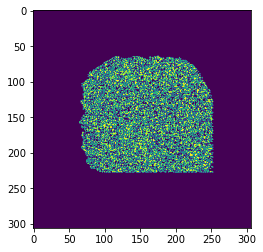

In [130]:
plt.imshow(output)
output.sum()

In [36]:
img[i-1:i+2,j-1:j+2],img.shape,img[0:5,6:9]

(array([[0, 0],
        [0, 0],
        [0, 0]]),
 (9, 9),
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [1, 0, 0]]))

In [74]:

possible = []
for vx0 in np.unique(vx0s):
    for vy0 in np.unique(vy0s):
        xs = [0]
        x0 = 0
        vx = vx0
        step = 0
        ys = [0]
        y0 = 0
        y_max = max(ys)
        vy = vy0
        step = 0
        while ((xs[-1] < (x_max+1)) and (vx > 0)) or (ys[-1] > (_y_min-1)):
            x = xs[-1]
            next_x = x + vx
            vx = max(0,vx-1)
            xs += [next_x]

            step += 1
            y = ys[-1]
            next_y = y + vy
            vy -= 1
            ys += [next_y]
            if (next_x <= x_max) and (next_x >= x_min) and (next_y <= _y_max) and (next_y >= _y_min):
                #print('found!')
                possible += [str((vx0, vy0))]
len(np.unique(possible)), possible

(492,
 ['(21, 0)',
  '(21, 1)',
  '(21, 1)',
  '(21, 2)',
  '(21, 2)',
  '(21, 2)',
  '(21, 3)',
  '(21, 3)',
  '(21, 3)',
  '(21, 3)',
  '(21, 4)',
  '(21, 4)',
  '(21, 4)',
  '(21, 5)',
  '(21, 5)',
  '(21, 5)',
  '(21, 5)',
  '(21, 6)',
  '(21, 6)',
  '(21, 6)',
  '(21, 6)',
  '(21, 7)',
  '(21, 7)',
  '(21, 7)',
  '(21, 8)',
  '(21, 8)',
  '(21, 8)',
  '(21, 8)',
  '(21, 9)',
  '(21, 9)',
  '(21, 9)',
  '(21, 10)',
  '(21, 10)',
  '(21, 10)',
  '(21, 11)',
  '(21, 11)',
  '(21, 11)',
  '(21, 11)',
  '(21, 12)',
  '(21, 12)',
  '(21, 12)',
  '(21, 13)',
  '(21, 13)',
  '(21, 13)',
  '(21, 14)',
  '(21, 14)',
  '(21, 15)',
  '(21, 15)',
  '(21, 15)',
  '(21, 16)',
  '(21, 16)',
  '(21, 16)',
  '(21, 17)',
  '(21, 17)',
  '(21, 17)',
  '(21, 18)',
  '(21, 18)',
  '(21, 19)',
  '(21, 19)',
  '(21, 20)',
  '(21, 20)',
  '(21, 21)',
  '(21, 21)',
  '(21, 21)',
  '(21, 22)',
  '(21, 22)',
  '(21, 23)',
  '(21, 23)',
  '(21, 24)',
  '(21, 24)',
  '(21, 25)',
  '(21, 25)',
  '(21, 26)',
  '

In [69]:
c = """23,-10  25,-9   27,-5   29,-6   22,-6   21,-7   9,0     27,-7   24,-5 
25,-7   26,-6   25,-5   6,8     11,-2   20,-5   29,-10  6,3     28,-7  
8,0     30,-6   29,-8   20,-10  6,7     6,4     6,1     14,-4   21,-6 
26,-10  7,-1    7,7     8,-1    21,-9   6,2     20,-7   30,-10  14,-3 
20,-8   13,-2   7,3     28,-8   29,-9   15,-3   22,-5   26,-8   25,-8 
25,-6   15,-4   9,-2    15,-2   12,-2   28,-9   12,-3   24,-6   23,-7 
25,-10  7,8     11,-3   26,-7   7,1     23,-9   6,0     22,-10  27,-6 
8,1     22,-8   13,-4   7,6     28,-6   11,-4   12,-4   26,-9   7,4 
24,-10  23,-8   30,-8   7,0     9,-1    10,-1   26,-5   22,-9   6,5 
7,5     23,-6   28,-10  10,-2   11,-1   20,-9   14,-2   29,-7   13,-3 
23,-5   24,-8   27,-9   30,-7   28,-5   21,-10  7,9     6,6     21,-5 
27,-10  7,2     30,-9   21,-8   22,-7   24,-9   20,-6   6,9     29,-5 
8,-2    27,-8   30,-5   24,-7""".split(' ')
c = [x.strip() for x in c if len(x)]
len(sorted(c))

112

In [54]:
np.unique(v0s)

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30])

In [73]:
found = []
vy0s=[]
for vy0 in tqdm(range(-500,1000)):
    ys = [0]
    y0 = 0
    y_max = max(ys)
    vy = vy0
    step = 0
    while ys[-1] > (_y_min-1):
        y = ys[-1]
        next_y = y + vy
        vy -= 1
        ys += [next_y]
        y_max = max(ys)
        step += 1
        if (next_y <= _y_max) and (next_y >= _y_min):
            #print(next_y, _y_max, _y_min)
            #print('found!')
            row = [vy0,step,y_max]
            found += [row]
            vy0s += [vy0]
np.unique(vy0s)

100%|██████████| 1500/1500 [00:07<00:00, 206.56it/s]


array([-124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114,
       -113, -112, -111, -110, -109, -108, -107, -106, -105, -104, -103,
       -102, -101, -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,
        -91,  -90,  -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,
        -80,  -79,  -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,
        -69,  -61,  -60,  -59,  -58,  -57,  -56,  -55,  -54,  -53,  -52,
        -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,
        -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,
        -29,  -28,  -27,  -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,
        -18,  -17,  -16,  -15,  -14,  -13,  -12,  -11,  -10,   -9,   -8,
         -7,   -6,   -5,   -4,   -3,   -2,   -1,    0,    1,    2,    3,
          4,    5,    6,    7,    8,    9,   10,   11,   12,   13,   14,
         15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,
         26,   27,   28,   29,   30,   31,   32,   

In [46]:
a = [x[0] for x in found]
len(np.unique(a))

116

In [5]:
b = '' 
for x in data:
    b += hex_2_bin[x]
#b = '00111000000000000110111101000101001010010001001000000000'
def split_into_parts(binary):
    v = binary[:3]
    t = binary[3:6]
    #print('binary',binary)
    if t == '100':
        
        subpackets = ''
        # literal value
        #print('literal',v,t)
        s, e = 6,11
        subpack = binary[s:e]
        #print(subpack,subpack[0] == '1')
        while subpack[0] == '1':
            
            subpackets += subpack[1:]
            s,e = s+5,e+5
            subpack = binary[s:e]
            #print(subpack)
        subpackets += subpack[1:]
        rest = binary[e:]
        #print('subs',subpackets)
        #print('rest',rest)
        out = {'type':'literal','v':int(v,2),'t':t,'val':int(subpackets,2)}
    else:
        #operator
        subpackets = []
        i = int(binary[6])
        #print('operator',v,t,i)
        if i == 0:
            #print('i',i)
            l = binary[7:22]

            length = int(l,2)
            #print('length',l,length)
            #not yet split
            subpackets += [binary[22:22+length]]
            #print(subpackets)
            rest=binary[22+length:]
            #print(rest)
            #print('subs',subpackets)
            #print('rest',rest)
            print(length)
            out = {'type':'operator','v':int(v,2),'t':t,'i':i,'l':l,'sub':split_into_parts(subpackets[0])}
        else:
            #print('i',i)
            l = binary[7:18]
            length = int(l,2)
            for j in range(length):
                subpackets += [binary[18:]]
            rest = ''
            #print('length',l,length)
            #print('subs',subpackets)
            #print('rest',rest)
            print(length)
            out = {'type':'operator','v':int(v,2),'t':t,'i':i,'l':l,'sub':split_into_parts(subpackets[0])}

    if (len(rest) > 0) and (int(rest)!=0):
        #print('looking at rest')
        return [out] + split_into_parts(rest)
    else:
        return [out]
        


a = split_into_parts(b)
def sum_versions(a):
    #print(a['v'],a['sub'],isinstance(a['sub'],list))
    if a.get('sub',None) is not None:
        return a['v'] + sum([sum_versions(sub) for sub in a['sub']])
    else:
        return a['v']

sum_versions(a[0]),a

53
2
2
3
3
1
1
398
376
354
332
1
1
1
1
1
220
198
1
158
136
114
1
1
56
2
72
105
2
2
104
5
3
2
3
3
3
3
33
100
47
31
2
106
33
3
2
2
120
75
32
1
2
27
1
2
2
2
2
33
33
3
3
33
33
2
2
101
2
64
3
4
2
2
87
1
2
62
32
160
2
33
3
115
72
63
144
106
3
33
4
110
57
5
2
2
27
2
42


(893,
 [{'type': 'operator',
   'v': 0,
   't': '000',
   'i': 1,
   'l': '00000110101',
   'sub': [{'type': 'literal', 'v': 6, 't': '100', 'val': 62231},
    {'type': 'operator',
     'v': 7,
     't': '001',
     'i': 1,
     'l': '00000000010',
     'sub': [{'type': 'operator',
       'v': 4,
       't': '111',
       'i': 1,
       'l': '00000000010',
       'sub': [{'type': 'operator',
         'v': 0,
         't': '000',
         'i': 1,
         'l': '00000000011',
         'sub': [{'type': 'literal', 'v': 3, 't': '100', 'val': 5},
          {'type': 'literal', 'v': 1, 't': '100', 'val': 15},
          {'type': 'literal', 'v': 0, 't': '100', 'val': 3},
          {'type': 'operator',
           'v': 4,
           't': '000',
           'i': 1,
           'l': '00000000011',
           'sub': [{'type': 'literal', 'v': 4, 't': '100', 'val': 14},
            {'type': 'literal', 'v': 7, 't': '100', 'val': 15},
            {'type': 'literal', 'v': 4, 't': '100', 'val': 6},
          

(16,
 [{'type': 'operator',
   'v': 4,
   't': '010',
   'i': 1,
   'l': '00000000001',
   'sub': [{'type': 'operator',
     'v': 1,
     't': '010',
     'i': 1,
     'l': '00000000001',
     'sub': [{'type': 'operator',
       'v': 5,
       't': '010',
       'i': 0,
       'l': '000000000001011',
       'sub': [{'type': 'literal', 'v': 6, 't': '100', 'val': 15}]}]}]}])

In [24]:
def get_adjacent(i,j, data):
    corners = []
    if i != (len(data) - 1):
        corners += [ (i+1,j) ]
    if j != (len(data[i]) - 1):
        corners += [(i,j+1)]
    return corners

def calc_path_risk(path, data):
    tot = sum([data[x] for x in path])
    last = path[-1]
    _max = tot + (len(data)-last[0])*9 + (len(data[0])-last[1])*9 + 1
    _min = tot + (len(data)-last[0])*1 + (len(data[0])-last[1])*1 + 1
    return tot, _min, _max#, tot>_max

ongoing_paths = [(0,0,0,sum(data)-data[0,0])]
i = 0
j = 0
path_no = 0
done_paths = []
k = 0
end_risks = []
while len(ongoing_paths):
    ongoing_paths.sort(key=lambda x: x[2] + x[3])
    ongoing_paths = ongoing_paths[1:100]
    path = ongoing_paths[0]
    print('looking at path',path)
    ongoing_paths = ongoing_paths[1:100]
    i,j,risk, h = path
    options = get_adjacent(i,j,data)
    if len(options) == 0:
        print('Found 1 end, risk:',risk)
        end_risks += [risk]
        done_paths += [path]
        ongoing_paths = ongoing_paths[1:]
        continue
    for option in options:
        new_i,new_j = option
        print(i*j/(len(data)*len(data[0])), len(ongoing_paths))
        new_risk = risk + data[new_i,new_j]
        new_h = np.mean(data[new_i:,new_j:])*(len(data)-new_i) + (len(data[0])-new_j) - data[new_i, new_j]
        ongoing_paths += [(new_i,new_j,new_risk,new_h)]
    #print(ongoing_paths)
    k+=1
    if k == 10000:
        break
    #ongoing_paths = ongoing_paths[1:]
min(end_risks)

looking at path (0, 0, 0, array([21, 26, 49, 43, 51, 28, 35, 42, 37, 40]))
0.0 0
0.0 1
looking at path (1, 0, 1, 43.5)
0.0 1
0.0 2
looking at path (2, 0, 3, 38.4)
0.0 2
0.0 3
looking at path (3, 0, 6, 34.2)
0.0 3
0.0 4
looking at path (4, 0, 13, 24.7)
0.0 4
0.0 5
looking at path (5, 0, 14, 27.2)
0.0 5
0.0 6
looking at path (6, 0, 15, 23.6)
0.0 6
0.0 7
looking at path (7, 0, 18, 17.9)
0.0 7
0.0 8
looking at path (8, 0, 19, 16.3)
0.0 8
0.0 9
looking at path (9, 0, 21, 11.8)
0.0 9
looking at path (9, 1, 24, 10.0)
0.09 9
looking at path (8, 1, 21, 14.777777777777779)
0.08 9
0.08 10
looking at path (9, 1, 24, 10.0)
0.09 10
looking at path (9, 2, 25, 11.125)
0.18 10
looking at path (9, 2, 25, 11.125)
0.18 10
looking at path (9, 3, 26, 10.571428571428571)
0.27 10
looking at path (9, 3, 26, 10.571428571428571)
0.27 10
looking at path (8, 2, 30, 7.125)
0.16 10
0.16 11
looking at path (9, 4, 35, 2.166666666666668)
0.36 11
looking at path (9, 4, 35, 2.166666666666668)
0.36 11
looking at path (7, 

0.36 99
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (4, 2, 22, 25.25)
0.08 99
0.08 100
looking at path (5, 2, 20, 27.25)
0.1 99
0.1 100
looking at path (6, 2, 25, 19.25)
0.12 99
0.12 100
looking at path (7, 2, 27, 18.125)
0.14 99
0.14 100
looking at path (8, 2, 36, 7.125)
0.16 99
0.16 100
looking at path (7, 3, 32, 14.142857142857142)
0.21 99
0.21 100
looking at path (8, 3, 35, 11.857142857142858)
0.24 99
0.24 100
looking at path (9, 3, 36, 10.571428571428571)
0.27 99
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (4, 2, 22, 25.25)
0.08 99
0.08 100
looking at path (6, 2, 28, 19.25)
0.12 99
0.12 100
looking at path (9, 5, 42, 5.4)
0.45 99
looking at path (7, 5, 32, 15.40000

0.32 99
0.32 100
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (8, 5, 39, 10.2)
0.4 99
0.4 100
looking at path (9, 5, 43, 5.4)
0.45 99
looking at path (8, 4, 36, 13.5)
0.32 99
0.32 100
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (8, 5, 39, 10.2)
0.4 99
0.4 100
looking at path (9, 5, 43, 5.4)
0.45 99
looking at path (8, 4, 36, 13.5)
0.32 99
0.32 100
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (8, 5, 39, 10.2)
0.4 99
0.4 100
looking at path (9, 5, 43, 5.4)
0.45 99
looking at path (8, 4, 36, 13.5)
0.32 99
0.32 100
looking at path (9, 4, 45, 2.166666666666668)
0.36 99
looking at path (8, 5, 39, 10.2)
0.4 99
0.4 100
looking at path (9, 5, 43, 5.4)
0.45 99
looking at path (8, 6, 45, 4.5)
0.48 99
0.48 100
looking at path (9, 6, 45, 4.5)
0.54 99
looking at path (8, 6, 45, 4.5)
0.48 99
0.48 100
looking at path (9, 6, 45, 4.5)
0.54 99
looking at path (8, 6, 45, 4.5)
0.48 99
0.48 100
looking at path (9, 6, 45, 4.5)
0.54 9

looking at path (7, 6, 32, 16.25)
0.42 99
0.42 100
looking at path (8, 6, 40, 4.5)
0.48 99
0.48 100
looking at path (7, 7, 38, 10.333333333333336)
0.49 99
0.49 100
looking at path (8, 7, 43, 5.333333333333332)
0.56 99
0.56 100
looking at path (9, 6, 44, 4.5)
0.54 99
looking at path (9, 6, 44, 4.5)
0.54 99
looking at path (9, 7, 47, 2.666666666666667)
0.63 99
looking at path (6, 7, 35, 14.666666666666664)
0.42 99
0.42 100
looking at path (8, 7, 45, 5.333333333333332)
0.56 99
0.56 100
looking at path (8, 7, 45, 5.333333333333332)
0.56 99
0.56 100
looking at path (9, 6, 46, 4.5)
0.54 99
looking at path (6, 8, 37, 13.5)
0.48 99
0.48 100
looking at path (6, 9, 38, 12.0)
0.54 99
looking at path (7, 9, 47, 3.0)
0.63 99
looking at path (8, 9, 48, 2.0)
0.72 99
looking at path (9, 9, 49, 1.0)
Found 1 end, risk: 49
looking at path (9, 7, 48, 2.666666666666667)
0.63 97
looking at path (4, 5, 26, 24.8)
0.2 97
0.2 98
looking at path (5, 5, 28, 21.6)
0.25 98
0.25 99
looking at path (6, 5, 29, 18.4)
0

looking at path (9, 7, 51, 2.666666666666667)
0.63 97
looking at path (9, 7, 51, 2.666666666666667)
0.63 97
looking at path (8, 8, 48, 6.0)
0.64 97
0.64 98
looking at path (8, 9, 49, 2.0)
0.72 98
looking at path (9, 9, 50, 1.0)
Found 1 end, risk: 50
looking at path (8, 8, 48, 6.0)
0.64 96
0.64 97
looking at path (8, 9, 49, 2.0)
0.72 97
looking at path (9, 9, 50, 1.0)
Found 1 end, risk: 50
looking at path (8, 8, 48, 6.0)
0.64 95
0.64 96
looking at path (8, 9, 49, 2.0)
0.72 96
looking at path (9, 9, 50, 1.0)
Found 1 end, risk: 50
looking at path (8, 8, 48, 6.0)
0.64 94
0.64 95
looking at path (8, 9, 49, 2.0)
0.72 95
looking at path (9, 9, 50, 1.0)
Found 1 end, risk: 50
looking at path (8, 7, 49, 5.333333333333332)
0.56 93
0.56 94
looking at path (9, 8, 56, -1.5)
0.72 94
looking at path (9, 8, 56, -1.5)
0.72 94
looking at path (9, 8, 56, -1.5)
0.72 94
looking at path (9, 8, 56, -1.5)
0.72 94
looking at path (9, 7, 52, 2.666666666666667)
0.63 94
looking at path (9, 7, 52, 2.666666666666667

looking at path (8, 9, 55, 2.0)
0.72 98
looking at path (9, 9, 56, 1.0)
Found 1 end, risk: 56
looking at path (9, 8, 59, -1.5)
0.72 96
looking at path (9, 8, 59, -1.5)
0.72 96
looking at path (9, 8, 59, -1.5)
0.72 96
looking at path (9, 8, 59, -1.5)
0.72 96
looking at path (9, 8, 59, -1.5)
0.72 96
looking at path (5, 3, 39, 18.57142857142857)
0.15 96
0.15 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)
0.63 97
looking at path (9, 7, 55, 2.666666666666667)

Found 1 end, risk: 60
looking at path (9, 9, 60, 1.0)
Found 1 end, risk: 60
looking at path (9, 9, 60, 1.0)
Found 1 end, risk: 60
looking at path (9, 9, 60, 1.0)
Found 1 end, risk: 60
looking at path (9, 9, 60, 1.0)
Found 1 end, risk: 60
looking at path (7, 8, 50, 11.0)
0.56 80
0.56 81
looking at path (8, 8, 52, 6.0)
0.64 81
0.64 82
looking at path (8, 9, 53, 2.0)
0.72 82
looking at path (9, 9, 54, 1.0)
Found 1 end, risk: 54
looking at path (7, 8, 50, 11.0)
0.56 80
0.56 81
looking at path (8, 8, 52, 6.0)
0.64 81
0.64 82
looking at path (8, 9, 53, 2.0)
0.72 82
looking at path (9, 9, 54, 1.0)
Found 1 end, risk: 54
looking at path (8, 8, 55, 6.0)
0.64 80
0.64 81
looking at path (8, 9, 56, 2.0)
0.72 81
looking at path (9, 9, 57, 1.0)
Found 1 end, risk: 57
looking at path (8, 8, 55, 6.0)
0.64 79
0.64 80
looking at path (8, 9, 56, 2.0)
0.72 80
looking at path (9, 9, 57, 1.0)
Found 1 end, risk: 57
looking at path (8, 8, 55, 6.0)
0.64 78
0.64 79
looking at path (8, 9, 56, 2.0)
0.72 79
looking 

43

In [27]:
len(done_paths)
min([calc_path_risk(path,data)[0] - data[0,0] for path in done_paths])

40

In [5]:
option

(1, 0)

In [62]:
from copy import deepcopy
#for each pair, we know which new pair will be created
prev, rules = data
rules = rules.split('\n')
rules = [x.split(' -> ') for x in rules]
#rules = {k:v for k,v in rules}

added_counts = []
for x,mid in rules:
    added_counts += [[x, [x[0]+mid,mid+x[1]]]]
added_counts = {k:v for k,v in added_counts}

prev, rules
n_steps = 10
prev_counts = Counter([prev[j:j+2] for j in range(len(prev)-1)])
for i in tqdm(range(1,n_steps+1)):
    print(i,prev_counts,'\n')
    new_counts = deepcopy(prev_counts)
    for c in prev_counts:
        #print('c',c)
        if prev_counts[c] == 0:
            #print('skipping, no values')
            continue
        additions = added_counts[c]
            
        for a in additions:
            #print('a',a)
            if new_counts.get(a,None) is None:
                new_counts[a] = 0
            new_counts[a] += prev_counts[c]
        new_counts[c] -= 1
    prev_counts = new_counts
prev_counts

100%|██████████| 10/10 [00:00<00:00, 12610.66it/s]

1 Counter({'NN': 1, 'NC': 1, 'CB': 1}) 

2 Counter({'NC': 1, 'CN': 1, 'NB': 1, 'BC': 1, 'CH': 1, 'HB': 1, 'NN': 0, 'CB': 0}) 

3 Counter({'CB': 2, 'NB': 2, 'BC': 2, 'BB': 2, 'CN': 1, 'CC': 1, 'BH': 1, 'HC': 1, 'NN': 0, 'NC': 0, 'CH': 0, 'HB': 0}) 

4 Counter({'NB': 5, 'BB': 5, 'BC': 4, 'HB': 3, 'CN': 2, 'CH': 2, 'BN': 2, 'NC': 1, 'CB': 1, 'CC': 1, 'BH': 1, 'HH': 1, 'NN': 0, 'HC': 0}) 

5 Counter({'NB': 15, 'BB': 15, 'BC': 8, 'BN': 8, 'CB': 5, 'CN': 4, 'HB': 3, 'BH': 3, 'HC': 3, 'CH': 2, 'CC': 2, 'NC': 1, 'HH': 1, 'HN': 1, 'NH': 1, 'NN': 0}) 

6 Counter({'NB': 45, 'BB': 45, 'BN': 30, 'BC': 19, 'CN': 10, 'HB': 10, 'CB': 9, 'CH': 7, 'BH': 7, 'HC': 6, 'CC': 5, 'NC': 3, 'HH': 3, 'HN': 1, 'NH': 1, 'NN': 0}) 

7 Counter({'BB': 138, 'NB': 137, 'BN': 104, 'BC': 46, 'CB': 25, 'CN': 25, 'HB': 24, 'BH': 20, 'CH': 16, 'HC': 16, 'CC': 14, 'HH': 9, 'NC': 8, 'HN': 3, 'NH': 3, 'NN': 0}) 

8 Counter({'BB': 424, 'NB': 419, 'BN': 345, 'BC': 115, 'CN': 66, 'CB': 64, 'HB': 64, 'BH': 55, 'CH': 43, 'HC': 42, 

Counter({'NN': 0,
         'NC': 612,
         'CB': 1232,
         'CN': 1400,
         'NB': 12091,
         'BC': 2087,
         'CH': 897,
         'HB': 1230,
         'CC': 781,
         'BB': 12240,
         'BH': 1163,
         'HC': 894,
         'BN': 11047,
         'HH': 652,
         'HN': 351,
         'NH': 351})

In [46]:
counts = Counter([prev[j:j+2] for j in range(len(prev)-1)])
counts['CB'] += 1
counts

Counter({'CB': 2,
         'BN': 1,
         'NB': 1,
         'BO': 2,
         'OK': 1,
         'KH': 1,
         'HV': 1,
         'VB': 1,
         'ON': 1,
         'NC': 1,
         'CP': 1,
         'PP': 1,
         'PB': 1,
         'BB': 1,
         'BC': 1,
         'CK': 1,
         'KV': 1,
         'VH': 1})

In [47]:
rules

for c in counts:
    print(c)

CB
BN
NB
BO
OK
KH
HV
VB
ON
NC
CP
PP
PB
BB
BC
CK
KV
VH
